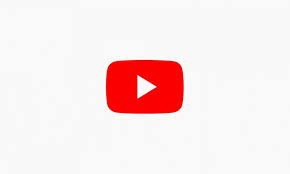

**Youtube Text Data Analysis**


Datasets used:

GBcomments and GBvideos

Contents:
1.	Performing Sentiment Analysis
2.	Wordcloud Representation of Sentiments
3.	Analyse Trending Tags and Views of Youtube
4.	Perform Emoji Analysis


## 1.	Performing Sentiment Analysis

In [ ]:
import pandas as pd #pandas is a python library for data analysis and manipulation

In [ ]:
import numpy as np
import matplotlib as plt #matplotlib is a python library for plotting and visualizations
import seaborn as sns #Python data visualization library based on matplotlib

In [ ]:
#read dataset
comments = pd.read_csv('https://bit.ly/3Azbu46',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [ ]:
comments.head()

video_id  ... replies
0  jt2OHQh0HoQ  ...       0
1  jt2OHQh0HoQ  ...       0
2  jt2OHQh0HoQ  ...       0
3  jt2OHQh0HoQ  ...       0
4  jt2OHQh0HoQ  ...       0

[5 rows x 4 columns]

**Sentiment analysis of Youtube Comments**

In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob('Its more accurate to call it the M+ (1000) be..').sentiment.polarity#extract polarity of this comment

0.45000000000000007

In [ ]:
comments.isna().sum()#sum of all missing value

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [ ]:
comments.dropna(inplace=True)#look for missing values

In [ ]:
polarity=[] # list which will contain the polarity of the comments

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [ ]:
comments['polarity']=polarity

In [ ]:
comments.head(20)

video_id  ...  polarity
0   jt2OHQh0HoQ  ...  0.450000
1   jt2OHQh0HoQ  ...  0.000000
2   jt2OHQh0HoQ  ...  0.000000
3   jt2OHQh0HoQ  ...  0.000000
4   jt2OHQh0HoQ  ...  1.000000
5   jt2OHQh0HoQ  ...  0.300000
6   jt2OHQh0HoQ  ...  0.000000
7   jt2OHQh0HoQ  ... -0.100000
8   jt2OHQh0HoQ  ...  0.028571
9   jt2OHQh0HoQ  ...  0.500000
10  jt2OHQh0HoQ  ...  0.500000
11  jt2OHQh0HoQ  ...  0.000000
12  jt2OHQh0HoQ  ...  0.300000
13  jt2OHQh0HoQ  ...  0.026563
14  jt2OHQh0HoQ  ...  0.500000
15  jt2OHQh0HoQ  ...  0.500000
16  jt2OHQh0HoQ  ...  0.200000
17  jt2OHQh0HoQ  ...  0.250000
18  jt2OHQh0HoQ  ...  0.500000
19  jt2OHQh0HoQ  ...  0.300000

[20 rows x 5 columns]

## **2.	Wordcloud Representation of Sentiments(EDA)**

In [ ]:
comments_positive=comments[comments['polarity']==1]

In [ ]:
comments_positive.shape

(20400, 5)

In [ ]:
comments_positive.head()

video_id  ... polarity
4    jt2OHQh0HoQ  ...      1.0
26   jt2OHQh0HoQ  ...      1.0
80   jt2OHQh0HoQ  ...      1.0
158  YPVcg45W0z4  ...      1.0
175  YPVcg45W0z4  ...      1.0

[5 rows x 5 columns]

**Creating a WordCloud for positive comments**

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
stopwords=set(STOPWORDS)#here stopwords are common pronouns that can be ignored

In [ ]:
total_comments=' '.join(comments_positive['comment_text'])

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

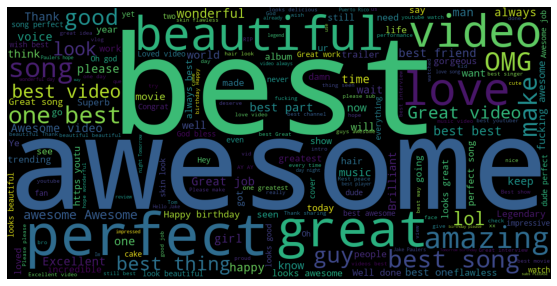

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

**In the above we see a wordcloud will full of positive keywords!**

**Now creating WordClouds for Negative comments**

In [ ]:
comments_negative=comments[comments['polarity']==-1]

In [ ]:
total_comments=' '.join(comments_negative['comment_text'])

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

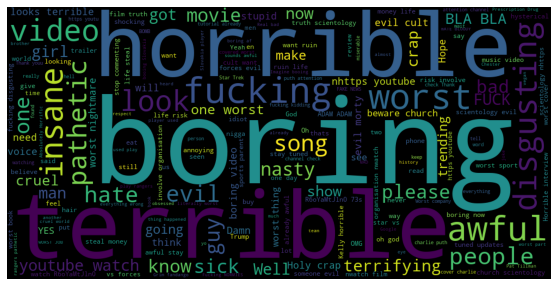

In [ ]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

## **3.	Analyse Trending Tags and Views of Youtube**

In [ ]:
videos = pd.read_csv(r'https://bit.ly/3yyariO',error_bad_lines=False)

b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'


In [ ]:
videos.head()

video_id  ...   date
0  jt2OHQh0HoQ  ...  13.09
1  AqokkXoa7uE  ...  13.09
2  YPVcg45W0z4  ...  13.09
3  T_PuZBdT2iM  ...  13.09
4  NsjsmgmbCfc  ...  13.09

[5 rows x 11 columns]

In [ ]:
tags_complete = ' '.join(videos['tags'])

In [ ]:
tags_complete

"apple events|apple event|iphone 8|iphone x|iphone 8 plus|iphone 7s|iphone 7s plus|ios 11 this morning|interview|holly willoughby|phillip schofield|ruth langsford|eamonn holmes|chat shows - topic|chat show - topic|talk shows - topic|sex robot|samantha|real life emmablackery|emma blackery|emma|blackery|british vlogger|british youtuber|female vlogger|birdyboots|dna test|23andme|ancestry skit|korean|language|conversation|esl|japanese|foreign|communication|don't speak|struggle|foreigner|lotte mart|korea|south|weather|good|tutorial sprinkleofglitter|sprinkle of glitter|baby glitter|Louise Pentland|Louise Pentland Baby Name|Mrs Meldrum|Baby Names|Nice baby names|Unusual baby names Rio Ferdinand|Rio|Ferdinand|5 Magazine|5 Mag|#5|5 Rio Ferdinand|Rio Ferdinand interview|football|soccer|interview|Manchester United|Man United|fifa 18|fut 18|fut|fifa ratings|fifa 18 ratings|chelsea|chelsea fc|chelsea f.c|David Luiz|Eden Hazard|Christensen|Premier League|Champions League|Fifa18|Hazard Fifa 18|David

In [ ]:
import re #regular expression

In [ ]:
tags = re.sub('[^a-zA-Z]',' ',tags_complete)

In [ ]:
tags

'apple events apple event iphone   iphone x iphone   plus iphone  s iphone  s plus ios    this morning interview holly willoughby phillip schofield ruth langsford eamonn holmes chat shows   topic chat show   topic talk shows   topic sex robot samantha real life emmablackery emma blackery emma blackery british vlogger british youtuber female vlogger birdyboots dna test   andme ancestry skit korean language conversation esl japanese foreign communication don t speak struggle foreigner lotte mart korea south weather good tutorial sprinkleofglitter sprinkle of glitter baby glitter Louise Pentland Louise Pentland Baby Name Mrs Meldrum Baby Names Nice baby names Unusual baby names Rio Ferdinand Rio Ferdinand   Magazine   Mag      Rio Ferdinand Rio Ferdinand interview football soccer interview Manchester United Man United fifa    fut    fut fifa ratings fifa    ratings chelsea chelsea fc chelsea f c David Luiz Eden Hazard Christensen Premier League Champions League Fifa   Hazard Fifa    David

In [ ]:
tags=re.sub(' +',' ',tags)

In [ ]:
wordcloud = WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

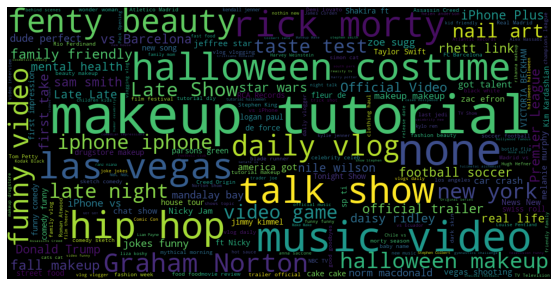

In [ ]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Using a regression plot to find relation between views vs likes

Text(0.5, 1.0, 'Regression plot for views and likes')

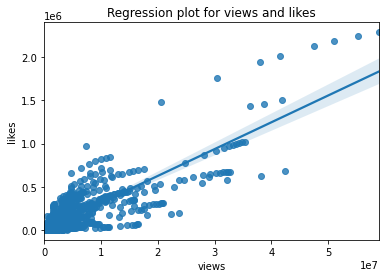

In [ ]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression plot for views and likes')

In above plot,we see that when our views increase our likes also increase.

Text(0.5, 1.0, 'Regression plot for views and dislikes')

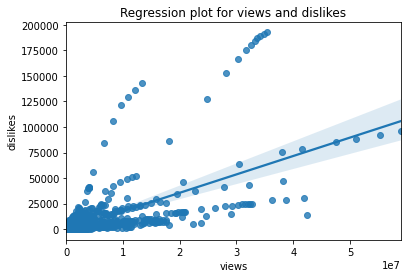

In [ ]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression plot for views and dislikes')

In the above plot,we see that if views increases then there isnt much increase in dislikes



Now,using heatmap for better analysis

In [ ]:
df_corr=videos[['views','likes','dislikes']]

In [ ]:
df_corr.corr()

views     likes  dislikes
views     1.000000  0.866249  0.671703
likes     0.866249  1.000000  0.623797
dislikes  0.671703  0.623797  1.000000

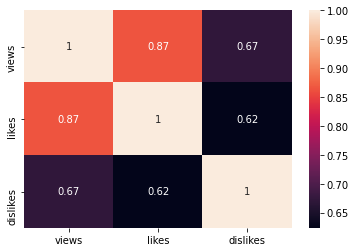

In [ ]:
sns.heatmap(df_corr.corr(),annot=True)

**Emoji Analysis**

In [ ]:
comments.head()

video_id  ... polarity
0  jt2OHQh0HoQ  ...     0.45
1  jt2OHQh0HoQ  ...     0.00
2  jt2OHQh0HoQ  ...     0.00
3  jt2OHQh0HoQ  ...     0.00
4  jt2OHQh0HoQ  ...     1.00

[5 rows x 5 columns]

In [ ]:
comments['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

In [ ]:
print('\U0001F600')#unicode for grinning face emoji..so we know every emoji has a specific unicode

😀


In [ ]:
!pip install emoji==0.6.0
#installing a specific version

     |████████████████████████████████| 51kB 2.0MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp37-none-any.whl size=49734 sha256=4306adf2bf07a442acb1c87f0368a7b3965dd5f4226dce175fda271423aa787c
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [ ]:
import emoji


In [ ]:
len(comments)

718424

In [ ]:
comment=comments['comment_text'][1]

In [ ]:
[c for c in comment if c in emoji.UNICODE_EMOJI]

['😂', '😂', '😂']

In [ ]:
str=''
for i in comments['comment_text']:
    list=[c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str=str+ele

In [ ]:
len(str)

341868

In [ ]:
str

'😂😂😂😭😭😭😢😢😢❤❤😂👏👇👇👇👇👇👇👇👇👇👇🌞😎😣😥😫😭✌😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂👏🏻👏🏻❤❤😜😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏🇪🇸😭💔😊❤❤❤❤❤😂😂😊❤😂🤣✨🌈😘😂😂❤😊😂😊😂💗😂😊😊😊💖🐢😉😍😂😂💗💗😻😻❤😂😂❤❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😎😎😎😎😎😎😎😍😍😍😍😍😍😘😘😘😘😘😘😘😲🖕💪🤘💓☺☺😂😂😂💕😄😄😍💕😉😩❤❤💕❤😂💕😍💗👫💖😆💕💖💕😍😍😊😄😍😀💗🦄😍😊😂😊👍😍♥❤😂👶🏻🤗☺😘💙💙💙😍😍😊😎🤘🖤👌👌😍😂👌🍍😎😎😄😄😄😄😂😂😂😬💜💜💜😭😂😍😍💖😂😂😂😂😂😂😂😭😂😭😂😭😂😂😂😍😍😍😭😍😍😂👀👀🤔😂😂😂😂😂😂😂😂😂😂🍸🍸🍸🍸🍸😂😂😂🤣🤣🤣😂😂😂😂😍💜💜💜💜😂😂😂😅😂😍💖😂😻😉🔥❤😻❤😭😭😭😭😭😭😭👍🏻😍💚💙❤❤😫❤❤❤❤❤♥😍❤😊😍😎💄🐐😅😂😂😊😊👀👌🏽❤❤❤😂💖🎉💪💪🏽😎🙌🙌😜❤❤💛💛😎🙏💚🎉🎉❤🎉🎉🎉🎉🎊🎉🎊🎉😭💗😍😍😍😍😍😍😍👏✌😁❤❤😂💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕❤😍🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😊❤❤❤❤🍔🍟🇺🇸😒🌿😄😄😄😉🍲🍱🎏❤💪👊🏽😘😂😂😂❤🙋☺😍😍😚💕😉😂❤❤😊☺💓🌸🙄🙄🙄🙁😞😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😉👍🏻🔥💯🚨😊☺😂😂😂🤣🙂❤❤😀😀😀♥♥😂❤😂😓😭😂❤❤😖😖😂😂😂💗💝😘💐💐💐😂😍☺😂❤😭💕🙌🏽🙌🏽🙌🏽😘😘❤❤💖😫😖📱😂😏🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😁🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😎😂😂👍🏼💯💕♥♥♥😱😱😱❤❤❤😍😍😩😩😩😩😩😩😩😍😻😻😻😻😻😳🥀♥♥♥♥♥♥😍😍😍🙃😂💕💕💕😍💕💕❤❤💕😍🍫🌹💖🇸🇸🇸🇸❤😍👸🏿👸🏿👸🏿👸🏿👸🏿💗😊😊😩❤👌🏼😻😊😍❤😂😂👏🏼❤❤❤❤❤😍😍😍💚💚💚💚💚😍😭🌹😍❤😍😍😍💚💚💚💚💚😍💚💚💚☺💙😀😍💚😕😍👌😂😂😂😍👌🏻💗❤💚💚💚😸😙😙😘💚💚💚💚😍😭😭💖💓💓💓😍❤😘😘🤗🤗🤗❤😀😀💓💓💓❤😂❤😍❤❤♥♥♥❤🙌❤😂❤❤😍❤💜😍😭😍😍😍😊💗💕😍❤💗💗💛💛💛💖💖😍😐😍😍😍😍🗿😂🤗😩😩😩💖💖💖❤❤❤❤❤😍😍✨😍👍🏻😁😂😍💅❤😘❤❤😈👀😄😈👍☝👆✊👌✌👊✋👋👏👐👉👈💔😂😂😬😭😥☺😂😂😂😂😍😍😍😜😂😂😂😂😂😒👎🏽😱😱😱😱😂😎😛🙊✊✌😑😑😑👌😊

Create a dictionary of having each emoji with its frequency as well

In [ ]:
#storing it as key value pair
result = {}
for i in set(str):
  result[i]=str.count(i)

In [ ]:
result

{'🔮': 52,
 '🖼': 5,
 '🍕': 111,
 '🎨': 33,
 '😐': 598,
 '☝': 187,
 '👟': 55,
 '🚭': 9,
 '🎣': 27,
 'Ⓜ': 5,
 '🌶': 45,
 '👝': 14,
 '🏅': 54,
 '🈂': 5,
 '🗂': 4,
 '⚪': 56,
 '🕒': 7,
 '💗': 3071,
 '🔅': 39,
 '🆕': 6,
 '🧖': 5,
 '☁': 71,
 '🍷': 58,
 '🚩': 12,
 '🎥': 106,
 '🆎': 5,
 '🗯': 13,
 '👆': 114,
 '🌚': 59,
 '👂': 23,
 '📻': 9,
 '🛂': 5,
 '📳': 20,
 '👚': 27,
 '👊': 376,
 '🥂': 33,
 '🚗': 27,
 '👮': 31,
 '📇': 10,
 '🕴': 6,
 '🤫': 3,
 '🚌': 16,
 '⚽': 223,
 '👃': 45,
 '🚇': 6,
 '🏴': 14,
 '🔎': 7,
 '📑': 8,
 '🙈': 576,
 '🎢': 22,
 '📃': 36,
 '😊': 4946,
 '🐤': 154,
 '🌨': 13,
 '✊': 318,
 '🏑': 12,
 '🤪': 10,
 '🤚': 23,
 '🚫': 54,
 '🐨': 39,
 '🔼': 5,
 '🏞': 8,
 '👌': 3534,
 '💟': 339,
 '🤸': 79,
 '🇪': 315,
 '♒': 10,
 '🆖': 5,
 '🦎': 8,
 '🔜': 23,
 '🥘': 6,
 '👡': 44,
 '🥋': 6,
 '💶': 64,
 '🔡': 5,
 '😒': 570,
 '🆙': 13,
 '🏆': 178,
 '🌲': 26,
 '📏': 20,
 '⚔': 10,
 '🍠': 16,
 '🚄': 6,
 '🤼': 24,
 '🚘': 10,
 '🍘': 10,
 '🇺': 302,
 '🏕': 7,
 '📵': 6,
 '🌒': 18,
 '🐝': 143,
 '🍫': 117,
 '📣': 32,
 '🌾': 33,
 '🔴': 819,
 '💕': 6531,
 '⚛': 8,
 '🛍': 22,
 '💝': 562,
 '💅': 166,

In [ ]:
result.items()

dict_items([('🔮', 52), ('🖼', 5), ('🍕', 111), ('🎨', 33), ('😐', 598), ('☝', 187), ('👟', 55), ('🚭', 9), ('🎣', 27), ('Ⓜ', 5), ('🌶', 45), ('👝', 14), ('🏅', 54), ('🈂', 5), ('🗂', 4), ('⚪', 56), ('🕒', 7), ('💗', 3071), ('🔅', 39), ('🆕', 6), ('🧖', 5), ('☁', 71), ('🍷', 58), ('🚩', 12), ('🎥', 106), ('🆎', 5), ('🗯', 13), ('👆', 114), ('🌚', 59), ('👂', 23), ('📻', 9), ('🛂', 5), ('📳', 20), ('👚', 27), ('👊', 376), ('🥂', 33), ('🚗', 27), ('👮', 31), ('📇', 10), ('🕴', 6), ('🤫', 3), ('🚌', 16), ('⚽', 223), ('👃', 45), ('🚇', 6), ('🏴', 14), ('🔎', 7), ('📑', 8), ('🙈', 576), ('🎢', 22), ('📃', 36), ('😊', 4946), ('🐤', 154), ('🌨', 13), ('✊', 318), ('🏑', 12), ('🤪', 10), ('🤚', 23), ('🚫', 54), ('🐨', 39), ('🔼', 5), ('🏞', 8), ('👌', 3534), ('💟', 339), ('🤸', 79), ('🇪', 315), ('♒', 10), ('🆖', 5), ('🦎', 8), ('🔜', 23), ('🥘', 6), ('👡', 44), ('🥋', 6), ('💶', 64), ('🔡', 5), ('😒', 570), ('🆙', 13), ('🏆', 178), ('🌲', 26), ('📏', 20), ('⚔', 10), ('🍠', 16), ('🚄', 6), ('🤼', 24), ('🚘', 10), ('🍘', 10), ('🇺', 302), ('🏕', 7), ('📵', 6), ('🌒', 18), ('🐝

In [ ]:
final={}
for key,value in sorted(result.items(),key =lambda item:item[1]):
    final[key]=value

In [ ]:
final  

{'🧤': 1,
 '🤟': 1,
 '🥨': 1,
 '🛷': 1,
 '🥡': 1,
 '🥌': 1,
 '🤹': 1,
 '🛒': 1,
 '🧠': 1,
 '🦓': 1,
 '🤽': 1,
 '🥚': 1,
 '🧣': 1,
 '🥜': 1,
 '🥟': 1,
 '🤺': 1,
 '🤾': 1,
 '🦏': 1,
 '🦖': 2,
 '🥅': 2,
 '🧢': 2,
 '🧡': 2,
 '🤱': 2,
 '🧘': 2,
 '🧛': 2,
 '🧒': 2,
 '🎌': 2,
 '🧝': 2,
 '🦕': 2,
 '🦔': 2,
 '🤫': 3,
 '🧐': 3,
 '🥖': 3,
 '🥄': 3,
 '🤨': 3,
 '🤯': 3,
 '🗂': 4,
 '🛢': 4,
 '🦍': 4,
 '🛬': 4,
 '🥞': 4,
 '⏯': 4,
 '🏌': 4,
 '⏏': 4,
 '💹': 4,
 '🏷': 4,
 '⏹': 4,
 '☸': 4,
 '🗄': 4,
 '⚙': 4,
 '🤵': 4,
 '♟': 4,
 '🖍': 4,
 '🥈': 4,
 '⏸': 4,
 '🗓': 4,
 '☦': 4,
 '⚗': 4,
 '🦐': 4,
 '♾': 4,
 '🥝': 4,
 '🛣': 4,
 '🖇': 4,
 '⏲': 4,
 '🧟': 4,
 '🦆': 4,
 '🤬': 4,
 '🖼': 5,
 'Ⓜ': 5,
 '🈂': 5,
 '🧖': 5,
 '🆎': 5,
 '🛂': 5,
 '🔼': 5,
 '🆖': 5,
 '🔡': 5,
 '🥉': 5,
 '🔚': 5,
 'ℹ': 5,
 '⛱': 5,
 '🛥': 5,
 '⚾': 5,
 '㊙': 5,
 '🕎': 5,
 '↩': 5,
 '🔃': 5,
 '🔁': 5,
 '🔣': 5,
 '🚎': 5,
 '☂': 5,
 '🈳': 5,
 '⏺': 5,
 '🗃': 5,
 '🕹': 5,
 '⛏': 5,
 '🔲': 5,
 '🈯': 5,
 '🈴': 5,
 '🗞': 5,
 '🖨': 5,
 '🔄': 5,
 '✡': 5,
 '◻': 5,
 '🈵': 5,
 '🏮': 5,
 '🦒': 5,
 '🔳': 5,
 '🎐': 5,
 '🔂': 5,
 '❎': 5,
 '➿': 5,
 

In [ ]:
## convert dictionary into list for this we have to unzip this dictionary
keys=[*final.keys()]

In [ ]:
keys

['🧤',
 '🤟',
 '🥨',
 '🛷',
 '🥡',
 '🥌',
 '🤹',
 '🛒',
 '🧠',
 '🦓',
 '🤽',
 '🥚',
 '🧣',
 '🥜',
 '🥟',
 '🤺',
 '🤾',
 '🦏',
 '🦖',
 '🥅',
 '🧢',
 '🧡',
 '🤱',
 '🧘',
 '🧛',
 '🧒',
 '🎌',
 '🧝',
 '🦕',
 '🦔',
 '🤫',
 '🧐',
 '🥖',
 '🥄',
 '🤨',
 '🤯',
 '🗂',
 '🛢',
 '🦍',
 '🛬',
 '🥞',
 '⏯',
 '🏌',
 '⏏',
 '💹',
 '🏷',
 '⏹',
 '☸',
 '🗄',
 '⚙',
 '🤵',
 '♟',
 '🖍',
 '🥈',
 '⏸',
 '🗓',
 '☦',
 '⚗',
 '🦐',
 '♾',
 '🥝',
 '🛣',
 '🖇',
 '⏲',
 '🧟',
 '🦆',
 '🤬',
 '🖼',
 'Ⓜ',
 '🈂',
 '🧖',
 '🆎',
 '🛂',
 '🔼',
 '🆖',
 '🔡',
 '🥉',
 '🔚',
 'ℹ',
 '⛱',
 '🛥',
 '⚾',
 '㊙',
 '🕎',
 '↩',
 '🔃',
 '🔁',
 '🔣',
 '🚎',
 '☂',
 '🈳',
 '⏺',
 '🗃',
 '🕹',
 '⛏',
 '🔲',
 '🈯',
 '🈴',
 '🗞',
 '🖨',
 '🔄',
 '✡',
 '◻',
 '🈵',
 '🏮',
 '🦒',
 '🔳',
 '🎐',
 '🔂',
 '❎',
 '➿',
 '🚟',
 '↖',
 '⌨',
 '🗳',
 '♠',
 '🚻',
 '♦',
 '🖲',
 '🥛',
 '🈲',
 '🈁',
 '⚒',
 '🚠',
 '🔢',
 '🔖',
 '🔠',
 '🆔',
 '🤮',
 '↔',
 '🛋',
 '🚛',
 '🗒',
 '◽',
 '🔤',
 '🗜',
 '🚁',
 '⛴',
 '🛤',
 '🚉',
 '🈹',
 '🌫',
 '🧜',
 '⛸',
 '↕',
 '🖊',
 '↪',
 '🆕',
 '🕴',
 '🚇',
 '🥘',
 '🥋',
 '🚄',
 '📵',
 '🏧',
 '🛅',
 '🛑',
 '⏮',
 '🚏',
 '🚈',
 '♻',
 '🏓',
 '🧞',
 '🛄',
 '⛹',
 '🏩',
 '🏤'

In [ ]:
values=[*final.values()]

In [ ]:
values

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [ ]:
df=pd.DataFrame({'chars':keys[-20:],'num':values[-20:] })

In [ ]:
df

chars    num
0      🙌   2734
1      🏼   2961
2      💙   2968
3      💗   3071
4      👌   3534
5      💜   3616
6      🏻   4412
7      💖   4809
8      😊   4946
9      👏   5357
10     😬   5489
11     👍   5817
12     😘   6334
13     💕   6531
14     ♥   7173
15     😭   9098
16     🔥  10249
17     😍  34856
18     ❤  36780
19     😂  43947

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
trace=go.Bar(
    x=df['chars'],
    y=df['num']
)
iplot([trace])

**So finally we can see the most commonly used emojis on the right**